[12 19 18  5 15 11 16  0  7  6  4 13  3  8 10 14  9  2  1 17]
['apl' 'bash' 'c#' 'clojure' 'dart' 'delphi' 'elixir' 'f#' 'go' 'html'
 'javascript' 'julia' 'kotlin' 'lisp' 'python' 'rust' 'solidity' 'sql'
 'swift' 'typescript']


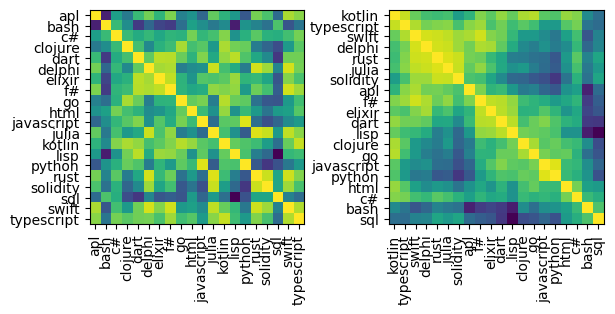

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def create_dummy_sim_mat(n):
    sm = np.random.random((n, n))
    sm = (sm + sm.T) / 2
    sm[range(n), range(n)] = 1
    return sm

def argsort_sim_mat(sm):
    idx = [np.argmax(np.sum(sm, axis=1))]  # a
    for i in range(1, len(sm)):
        sm_i = sm[idx[-1]].copy()
        sm_i[idx] = -1
        idx.append(np.argmax(sm_i))  # b
    return np.array(idx)


n = 20

# read csv ('/Users/ddevin/Documents/vscode/DevCommunities/results/cpprofilesALL.csv')
# read csv file
f = open('/Users/ddevin/Documents/vscode/DevCommunities/results/cpprofilesALL_cos.csv', 'r')
# create list of lists
lines = f.readlines()
my_sim_mat = []
for line in lines:
    l = line.split(',')
    # convert list of strings to list of floats
    l = [float(i) for i in l]
    my_sim_mat.append(l)
# # convert list of lists to numpy array
# sim_mat = np.array(sim_mat)
# convert my_sim_mat to numpy array
my_sim_mat = np.array(my_sim_mat)
# sim_mat = create_dummy_sim_mat(n=n)
# print(sim_mat)
# print(my_sim_mat)
# idx = argsort_sim_mat(sim_mat)
idx = argsort_sim_mat(my_sim_mat)
sim_mat2 = my_sim_mat[idx, :][:, idx]  # apply reordering for rows and columns

# Plot results
fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=3.0)
ax[0].imshow(my_sim_mat)
ax[1].imshow(sim_mat2)

my_tags_so = ["rust" ,"elixir","clojure", "typescript" ,"julia", "python", "delphi", "go" ,"sql", "c#" ,"kotlin", "swift" ,"dart" ,"html", "solidity", "javascript", "f#", "bash" ,"lisp", "apl"]
my_tags_so = np.array(my_tags_so)
# sort my_tags_so alphabetically
my_tags_so = np.sort(my_tags_so)
print(idx)
my_tags_so_ordered = my_tags_so[idx]
print(my_tags_so)

def ticks(_ax, ti, la):
    _ax.set_xticks(ti)
    _ax.set_yticks(ti)
    _ax.set_xticklabels(la)
    # set orientation of xticklabels
    _ax.set_xticklabels(la, rotation=90)
    _ax.set_yticklabels(la)

ticks(_ax=ax[0], ti=range(n), la=my_tags_so)
ticks(_ax=ax[1], ti=range(n), la=my_tags_so_ordered)